<a href="https://colab.research.google.com/github/pythonpro16/adaptive-weighted-guided-image-filtering/blob/main/adaptive_weighted_guided_image_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/jaigarg/Image-Dehazing-using-Steering-Kernel-Weighted-Guided-Image-Filtering.git

Cloning into 'Image-Dehazing-using-Steering-Kernel-Weighted-Guided-Image-Filtering'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 30 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), 2.69 MiB | 8.50 MiB/s, done.


In [3]:
%cd /content/Image-Dehazing-using-Steering-Kernel-Weighted-Guided-Image-Filtering

/content/Image-Dehazing-using-Steering-Kernel-Weighted-Guided-Image-Filtering


In [12]:
from google.colab.patches import cv2_imshow

Import 'from google.colab.patches import cv2_imshow' in all file and replace cv2.imshow with cv2_imshow()
specifi the image path correctly

[[[121 121 121]
  [113 113 113]
  [136 136 136]
  ...
  [ 17  17  17]
  [ 21  21  21]
  [ 21  21  21]]

 [[106 106 106]
  [132 132 132]
  [121 121 121]
  ...
  [ 40  40  40]
  [ 19  19  19]
  [ 19  19  19]]

 [[113 113 113]
  [137 137 137]
  [113 113 113]
  ...
  [ 40  40  40]
  [ 48  48  48]
  [ 22  22  22]]

 ...

 [[ 42  42  42]
  [ 37  37  37]
  [ 36  36  36]
  ...
  [127 127 127]
  [118 118 118]
  [126 126 126]]

 [[ 40  40  40]
  [ 36  36  36]
  [ 35  35  35]
  ...
  [117 117 117]
  [121 121 121]
  [117 117 117]]

 [[ 40  40  40]
  [ 39  39  39]
  [ 32  32  32]
  ...
  [138 138 138]
  [118 118 118]
  [117 117 117]]]


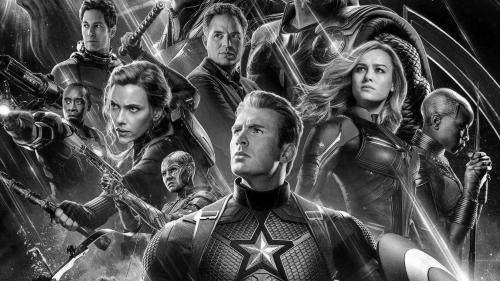

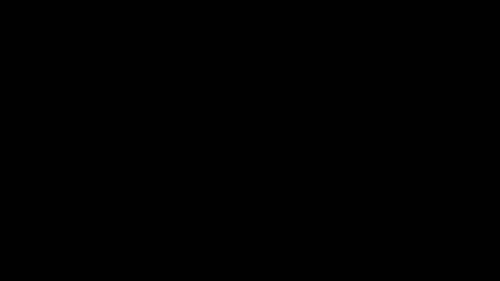

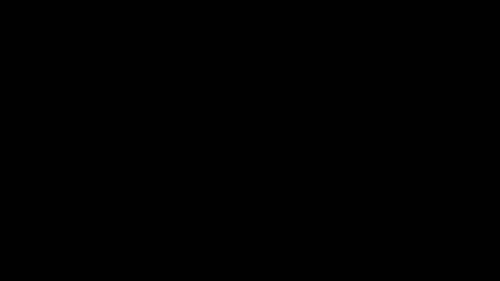

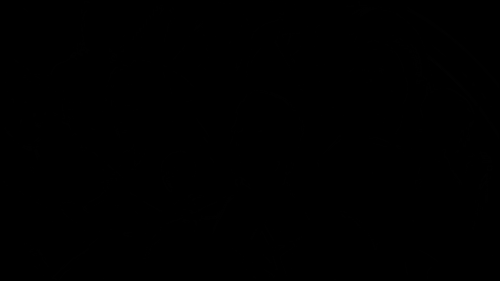

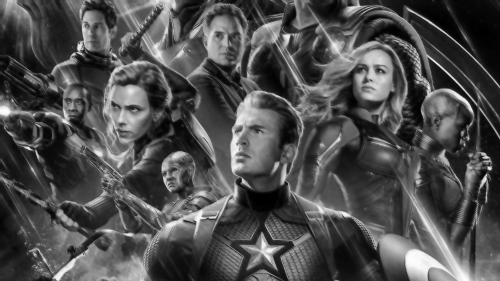

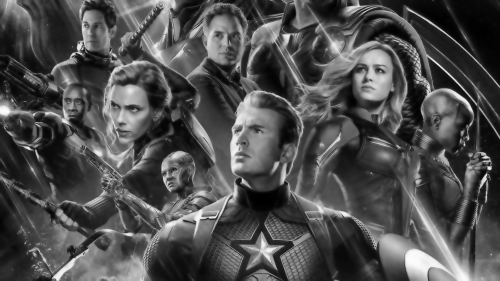

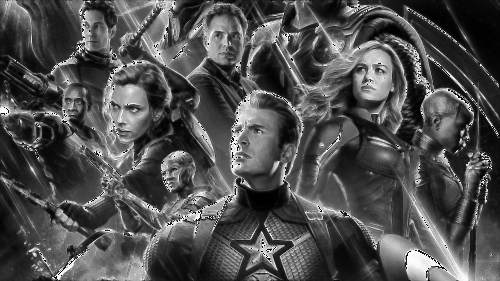

In [31]:
%run File1_Steering_Kernel_WGIF_Implementation.py

In [ ]:
%run File1_Steering_Kernel_WGIF_Implementation.py

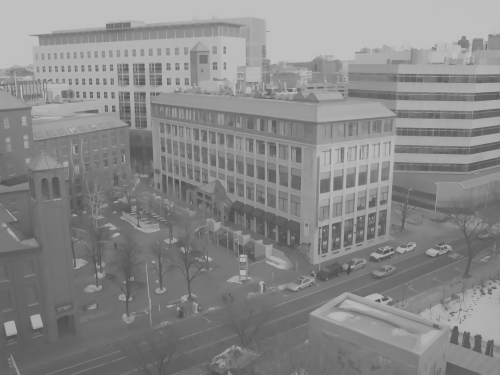

hello


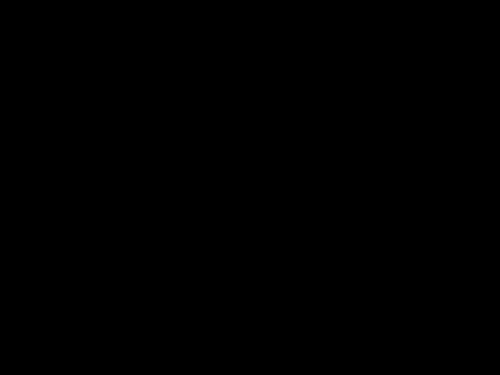

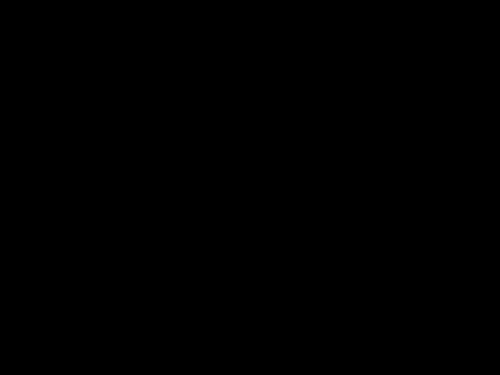

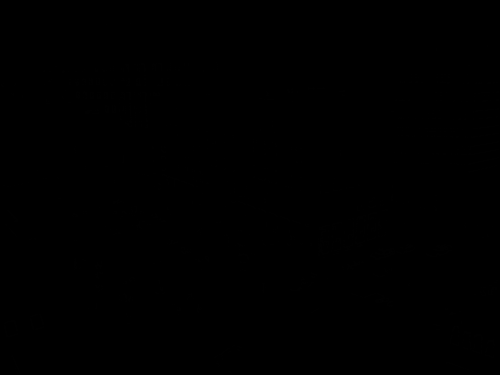

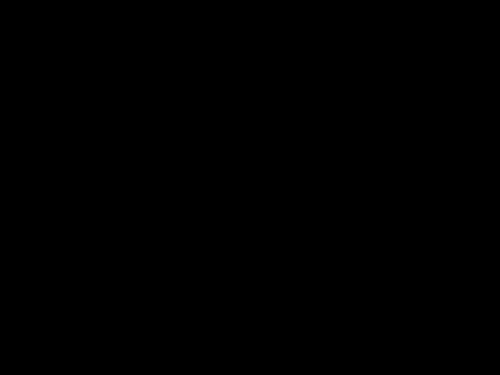

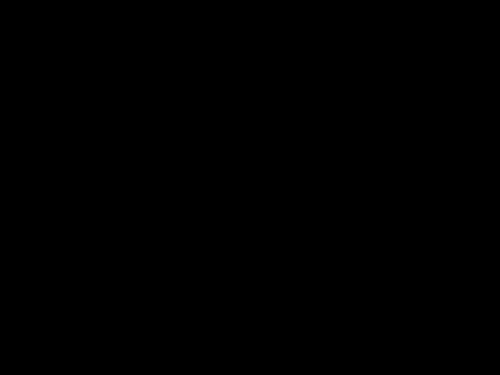

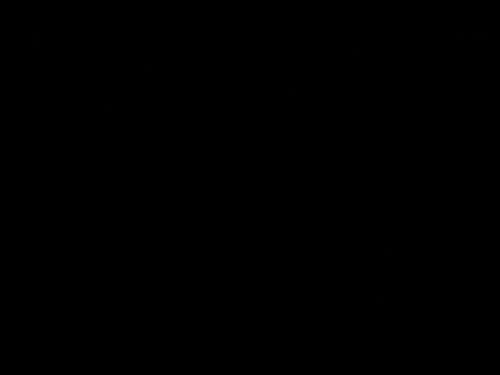

In [21]:
%run 'File2_Image Dehazing Using SKWGIF and Histogram Equalization.py'

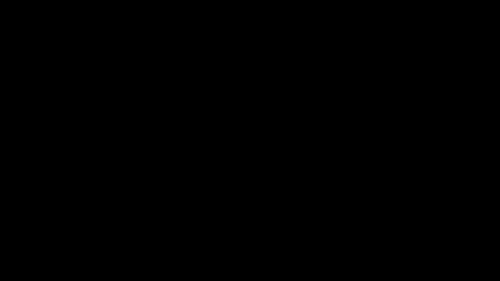

In [29]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def adaptive_weighted_guided_filter(input_image, guide_image, radius, eps):
    input_image = np.float32(input_image) / 255.0
    guide_image = np.float32(guide_image) / 255.0

    mean_I = cv2.boxFilter(guide_image, cv2.CV_32F, (radius, radius))
    mean_p = cv2.boxFilter(input_image, cv2.CV_32F, (radius, radius))
    mean_Ip = cv2.boxFilter(guide_image * input_image, cv2.CV_32F, (radius, radius))
    cov_Ip = mean_Ip - mean_I * mean_p

    mean_II = cv2.boxFilter(guide_image * guide_image, cv2.CV_32F, (radius, radius))
    var_I = mean_II - mean_I * mean_I

    a = cov_Ip / (var_I + eps)
    b = mean_p - a * mean_I

    mean_a = cv2.boxFilter(a, cv2.CV_32F, (radius, radius))
    mean_b = cv2.boxFilter(b, cv2.CV_32F, (radius, radius))

    output = mean_a * guide_image + mean_b
    return output


input_image = cv2.imread('/content/Image-Dehazing-using-Steering-Kernel-Weighted-Guided-Image-Filtering/Input Images Used/Avengers.png')
guide_image = cv2.imread('/content/Image-Dehazing-using-Steering-Kernel-Weighted-Guided-Image-Filtering/Input Images Used/Avengers.png')


radius = 3
eps = 0.1
filtered_image = adaptive_weighted_guided_filter(input_image, guide_image, radius, eps)


cv2_imshow(filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

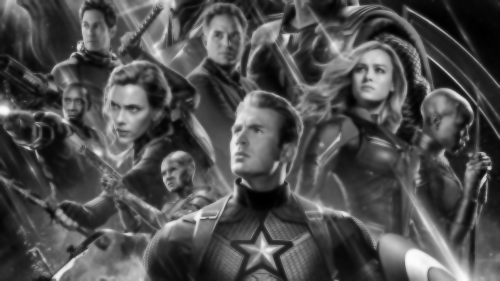

In [30]:
input_image = cv2.imread('/content/Image-Dehazing-using-Steering-Kernel-Weighted-Guided-Image-Filtering/Input Images Used/Avengers.png')
guide_image = cv2.imread('/content/Image-Dehazing-using-Steering-Kernel-Weighted-Guided-Image-Filtering/Input Images Used/Avengers.png')

radius = 3
eps = 0.1
filtered_image = adaptive_weighted_guided_filter(input_image, guide_image, radius, eps)

filtered_image = np.uint8(filtered_image * 255)  # Scale the filtered image to 8-bit range

cv2_imshow(filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
